- Create a distribution of datapoints that are separable based on categories
- Show the distribution of points with and without categories
- Run the stats, show what the F-statistic looks like, and how we get it
- Effect size and how we get it

In [22]:
# Imports for analyzing and visualizing data
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [2]:
# Generate a set of data from Gaussian distributions offset for each category
# Set random seed for reproducibility
np.random.seed(42)

# Number of subjects and levels
n_subjects = 20
levels = ['red','blue','green']
n_levels = len(levels)

# Mean values and standard deviation for each level
means = [600, 650, 800]
std = 50 # this is the variability within participants

# Simulate data ensuring values are between 0 and 100
data = []
for subject in range(1, n_subjects + 1):
    for level in range(1, n_levels + 1):
        value = np.random.normal(means[level - 1], std)
        data.append([subject, levels[level-1], value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Subject', 'Condition', 'Response time'])

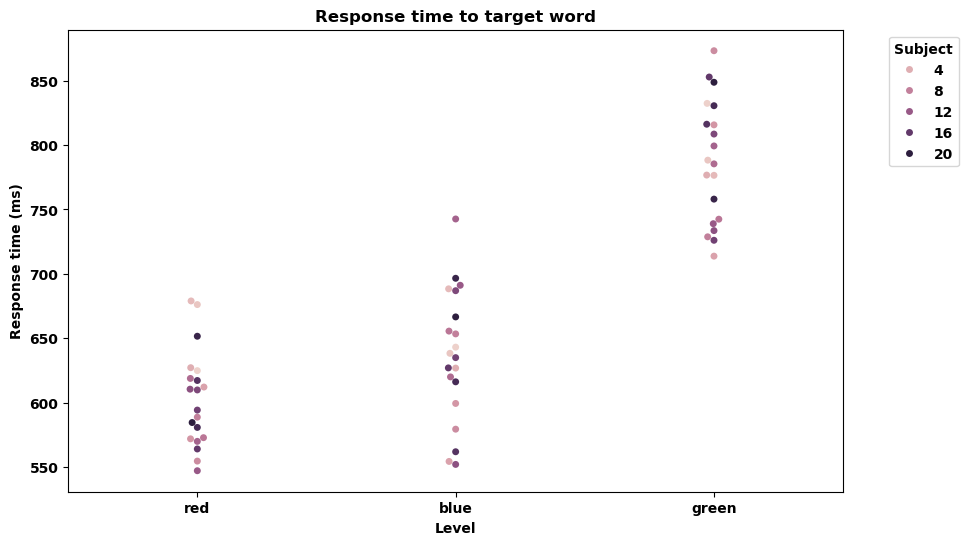

In [3]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Condition', y='Response time', hue='Subject')
plt.title('Response time to target word')
plt.xlabel('Level')
plt.ylabel('Response time (ms)')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [5]:
aov = pg.anova(dv='Response time', between='Condition', data=df, detailed=True)
print(aov)

      Source             SS  DF             MS         F         p-unc  \
0  Condition  385912.070462   2  192956.035231  92.86732  1.164604e-18   
1     Within  118432.339340  57    2077.760339       NaN           NaN   

        np2  
0  0.765176  
1       NaN  


In [20]:
# Calculate the F statistic comparing the total variance to the error variance
MS_total = df['Response time'].var()
print(f'Variance total: {MS_total}')
MS_error = df[['Response time','Condition']].groupby('Condition').var() # calculate variances within each group
MS_error = MS_error.mean().iloc[0] #
print(f'Variance error: {MS_error}')

Variance total: 8548.210335628079
Variance error: 2077.760339291721


In [24]:
# Calculate the alternative F statistic and display the associated p-value
F = MS_total/MS_error
pval = sp.stats.f.sf(F,59,57)
print(f'F = {F}, p = {pval}')

F = 4.114146455669687, p = 1.3642614100984495e-07


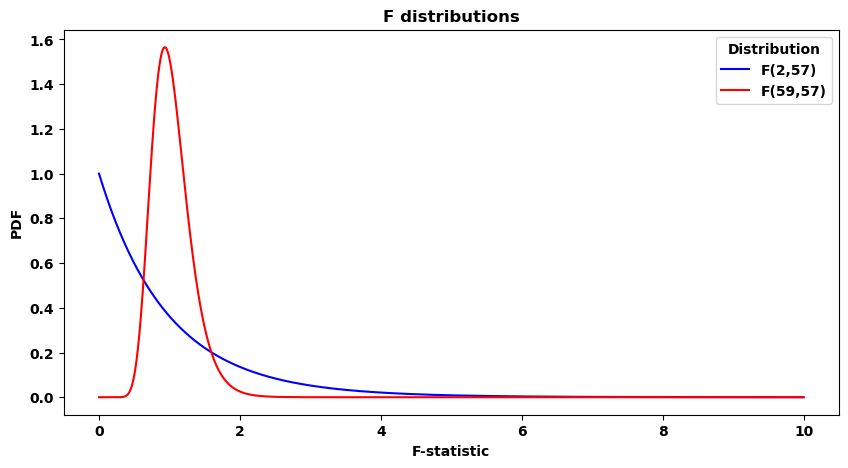

In [30]:
# Display the two F-statistic distribution with different degrees of freedom
x = np.arange(0,10,0.01)
Fdistr_corr = sp.stats.f.pdf(x,2,57)
Fdistr_alt = sp.stats.f.pdf(x,59,57)

plt.figure(figsize=(10, 5))
plt.plot(x,Fdistr_corr,color='blue',label='F(2,57)')
plt.plot(x,Fdistr_alt,color='red',label='F(59,57)')
plt.title('F distributions')
plt.xlabel('F-statistic')
plt.ylabel('PDF')
plt.legend(title='Distribution')
plt.show()